# ML - Arbol de Decision 

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import tree

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos el archivo con los datos de Training Limpios
df = pd.read_csv('data_cleanAlgoritmo.csv')
df = df.set_index('id')
df.head()

,name,release_date,artists,total_tracks,t_name0,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,,,,,,
0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,7.0,1.0,192284.000,0.537,0.459,0.049,0.490,0.000,0.091,0.779,133.243,3.333,51.0,3
1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,10.0,0.0,195199.667,0.779,0.658,0.202,0.109,0.000,0.114,0.413,139.028,4.000,67.0,4
2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,8.0,0.0,154768.333,0.555,0.487,0.273,0.241,0.029,0.287,0.521,122.269,4.000,81.0,5
3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,8.0,1.0,203866.333,0.628,0.585,0.027,0.333,0.000,0.203,0.556,114.783,4.000,53.0,3
4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,9.0,1.0,140693.000,0.638,0.302,0.072,0.711,0.000,0.271,0.533,116.460,4.000,70.0,4


In [3]:
df.shape

(72357, 19)

In [4]:
#Verificamos que no hay valores nulos 
df.isnull().sum()

name                0
release_date        0
artists             0
total_tracks        0
t_name0             0
t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
t_sig0              0
popularity          0
ClasePopularidad    0
dtype: int64

In [5]:
'''Dividimos el data set en Atributos y Target'''

X = df.drop(['name','release_date','artists','total_tracks','t_name0','popularity','ClasePopularidad'],axis = 1)
y = df['popularity']


In [6]:
'''Hacemos el split en Train set y Test Set
Usaremos un split de 80%-20%'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [7]:
#Modelo de Arbol de Decision

'''Creamos el modelo, con una poda de 5'''


modelArbol= tree.DecisionTreeClassifier(random_state = 13, max_depth = 5) 
modelArbol.fit(X_train, y_train) 


DecisionTreeClassifier(max_depth=5, random_state=13)

In [8]:
#prediccion

yPredTest = modelArbol.predict(X_test)
yPredTest

array([47., 27., 47., ...,  1., 27.,  1.])

### Evaluacion del Modelo - Metricas

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, yPredTest)
MAE = mean_absolute_error(y_test, yPredTest)
MSE = mean_squared_error(y_test, yPredTest)

print(f'Para este arbol de decision el absolute error es {MAE}, el mean squared error es de {MSE} y el r2 es de {r2}')



Para este arbol de decision el absolute error es 19.88460475400774, el mean squared error es de 636.3736871199558 y el r2 es de -0.8675468064212226


In [10]:
yTest = y_test.reset_index()
Results = yTest.drop('id', axis = 1)
Results['prediccion'] = yPredTest
Results['diferencia'] = Results['popularity'] - Results['prediccion']
Results
    

,popularity,prediccion,diferencia
0,56.0,47.0,9.0
1,22.0,27.0,-5.0
2,22.0,47.0,-25.0
3,50.0,47.0,3.0
4,35.0,47.0,-12.0
...,...,...,...
14467,38.0,47.0,-9.0
14468,13.0,1.0,12.0
14469,37.0,1.0,36.0
14470,28.0,27.0,1.0


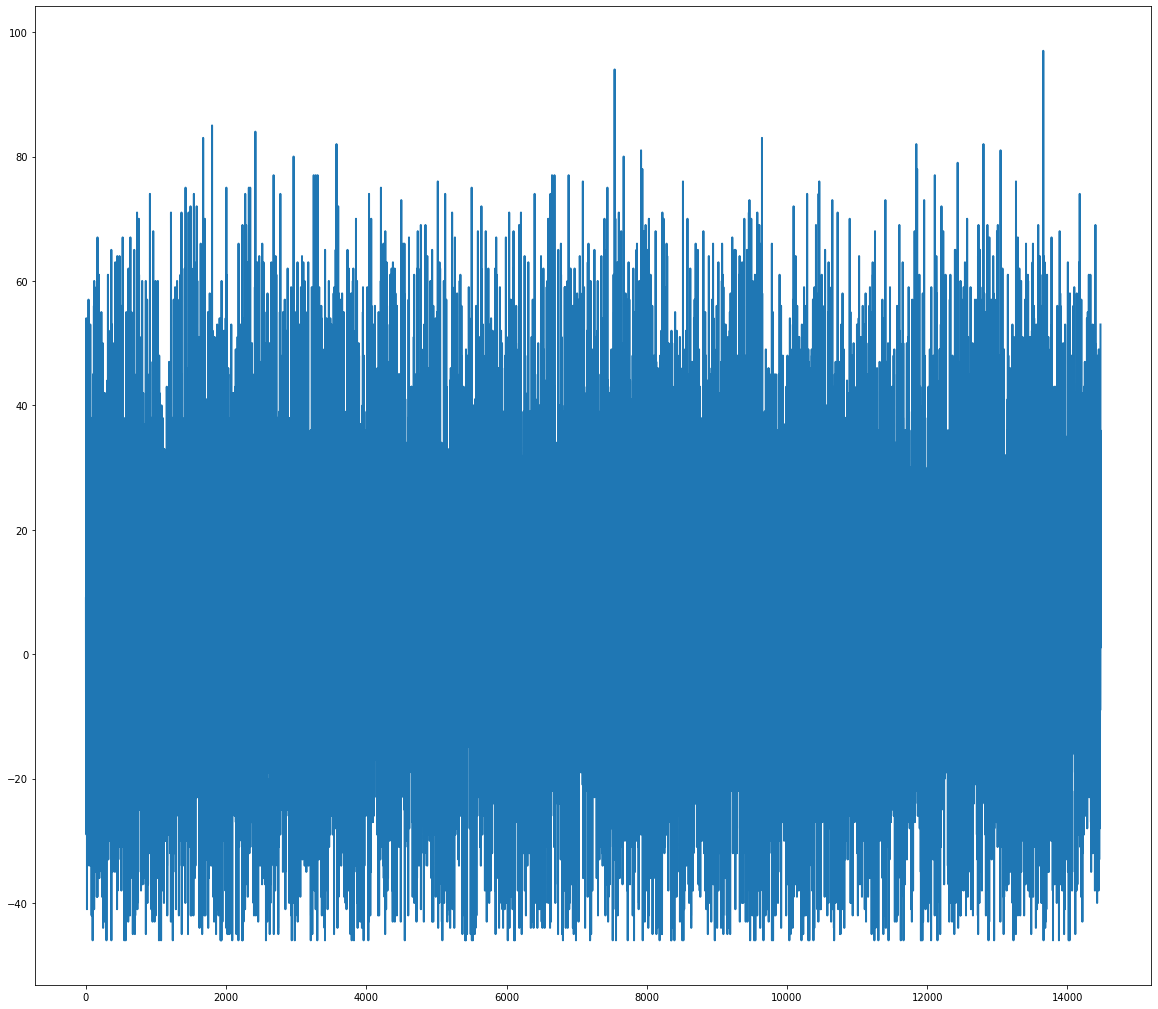

In [11]:
fig, ax = plt.subplots(figsize = (20,18))

ax.plot(Results['diferencia'], linewidth=2.0)

**Observaciones**

El resultado de este modelo no es bueno, se puede ver que el r2 dio un valor negativo. En la graifca tambien podemos ver la gran diferencia uqe hay entre los valores individuales reales y los que dio el modelo

In [12]:
'''Probamos nuevamente pero sin fijar una poda'''

modelArbol2= tree.DecisionTreeClassifier(random_state = 13) 
modelArbol2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [13]:
yPredTest2 = modelArbol2.predict(X_test)
yPredTest2

array([ 8., 47., 55., ..., 21., 10., 63.])

In [14]:
#Evaluacion


r2 = r2_score(y_test, yPredTest2)
MAE = mean_absolute_error(y_test, yPredTest2)
MSE = mean_squared_error(y_test, yPredTest2)

print(f'Para este arbol de decision el absolute error es {MAE}, el mean squared error es de {MSE} y el r2 es de {r2}')


Para este arbol de decision el absolute error es 18.90685461580984, el mean squared error es de 572.637506909895 y el r2 es de -0.6805021466341665


**Observaciones**

Vemos que aun sin fijar la poda se tiene un mal resultado.

### Arbol de decision para Clasificacion

Como el algoritmo de Arbol de decision dio malos resultados al problema de Regresion, se prueba aplicarlo para el problema de calsificacion, usando como Target la variable creada **ClasePopularidad**

In [15]:
'''Tomamos la variable Target de Clasificacion "ClasePopularidad" '''

yclasif = df['ClasePopularidad']

'''Hacemos el split en Train set y Test Set
Usaremos un split de 80%-20%'''
X_trainClas, X_testClas, y_trainClas, y_testClas = train_test_split(X, yclasif, test_size=0.20, random_state=13)

In [16]:
#Modelo de Arbol de Decision

'''Creamos el modelo'''


modelArbolClas= tree.DecisionTreeClassifier(random_state = 13, max_depth = 7) 
modelArbolClas.fit(X_trainClas, y_trainClas) 

#prediccion

yPredClas = modelArbolClas.predict(X_testClas)
yPredClas

array([2, 2, 2, ..., 1, 1, 1])

In [17]:
#Evaluacion para Clasificacion

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('La precision del algoritmo es de:', accuracy_score(y_testClas,yPredClas))

confusion_matrixArbol = pd.DataFrame(confusion_matrix(y_testClas, yPredClas))
confusion_matrixArbol.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixArbol.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixArbol)

La precision del algoritmo es de: 0.3971116639027087
           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  1951                  2420              361   
MediaBaja             1505                  3105              530   
Media                  713                  2261              691   
MediaAlta              179                   538              196   
Alta                     6                    13                3   

           Prediccion MediaAlta  Prediccion Alta  
Baja                          0                0  
MediaBaja                     0                0  
Media                         0                0  
MediaAlta                     0                0  
Alta                          0                0  


In [18]:
yTestClas = y_testClas.reset_index()
ResultsClas = yTestClas.drop('id', axis = 1)
ResultsClas['prediccion'] = yPredClas
ResultsClas.loc[ResultsClas['ClasePopularidad']>4]
    

,ClasePopularidad,prediccion
1521,5,2
1672,5,2
1799,5,2
2417,5,2
2962,5,3
3078,5,2
3559,5,2
3574,5,2
3677,5,2
4279,5,3


**Observaciones**

Tenemos un accuracy de 39% con este metodo. Lo que se puede ver es que el modelo no predice valores de clase de popularidad Media-Alta ni Alta. Esto tiene sentido si tenemos en cuenta que la variable Target esta sesgada a la derecha (muchos registros con baja popularidad y pocos con alta). 

# ML - Random Forest

In [19]:
#Importamos el algoritmo

from sklearn.ensemble import RandomForestRegressor

In [20]:
'''Utilizando la misma division que se uso para la Regresion por Arbol de decision'''

X_test
y_train

id
146790    34.0
142735     2.0
971       62.0
61341     19.0
153359    43.0
          ... 
70247     21.0
44415     61.0
142189    46.0
62804     30.0
95312     10.0
Name: popularity, Length: 57885, dtype: float64

In [21]:
modelo_random_forest = RandomForestRegressor(n_estimators = 50) 
modelo_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [22]:
#Se hace la prediccion
y_pred = modelo_random_forest.predict(X_test)

In [23]:
#Evaluacion de modelo de Regresion

r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'Para este arbol de decision el absolute error es {MAE}, el mean squared error es de {MSE} y el r2 es de {r2}')




Para este arbol de decision el absolute error es 14.176551484749972, el mean squared error es de 301.47858611924886 y el r2 es de 0.1152598196517528


### Random Forest para Clasificacion

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
'''Utilizando la misma division que se uso para la Regresion por Arbol de decision'''

X_testClas
y_trainClas

id
146790    2
142735    1
971       4
61341     1
153359    3
         ..
70247     2
44415     4
142189    3
62804     2
95312     1
Name: ClasePopularidad, Length: 57885, dtype: int64

In [26]:
modelo_random_forestClas = RandomForestClassifier(n_estimators = 50) 
modelo_random_forestClas.fit(X_trainClas, y_trainClas)

RandomForestClassifier(n_estimators=50)

In [27]:
#Se hace la prediccion
y_predClas = modelo_random_forestClas.predict(X_testClas)

In [28]:
y_predClas

array([1, 1, 2, ..., 2, 1, 1])

In [29]:
#accuracy
print('La precision del algoritmo es de:', accuracy_score(y_testClas,y_predClas))

confusion_matrixForest = pd.DataFrame(confusion_matrix(y_testClas, y_predClas))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)

La precision del algoritmo es de: 0.41003316749585406
           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  2261                  1928              539   
MediaBaja             1761                  2521              848   
Media                  947                  1586             1096   
MediaAlta              221                   357              279   
Alta                     8                     9                1   

           Prediccion MediaAlta  Prediccion Alta  
Baja                          4                0  
MediaBaja                    10                0  
Media                        36                0  
MediaAlta                    54                2  
Alta                          2                2  


In [30]:
yTestClas = y_testClas.reset_index()
ResultsClas = yTestClas.drop('id', axis = 1)
ResultsClas['prediccion'] = y_predClas
ResultsClas.loc[ResultsClas['ClasePopularidad']>4]
    

,ClasePopularidad,prediccion
1521,5,2
1672,5,2
1799,5,2
2417,5,4
2962,5,4
3078,5,2
3559,5,1
3574,5,3
3677,5,1
4279,5,5


**Observaciones**

El algoritmo de Random Forest mejora un poco la performance del Arbol de Decision. Al hacer el modelo de clasificacion, vemos que ahora si el modelo llega a predecir Popularidades Media-Altas y Altas, que el Arbol no lograba predecir.